In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## Building a Convolutional Neural Network

In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
import tensorflow as tf

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Note: a 3x3 filter will reduce a 28x28 image to a 26x26 image
# The above lines put 32 different such filters (with different kernels) into the model

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

#gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.08, shear_range=0.4,
#                         height_shift_range=0.08, zoom_range=0.08)
#rotation range: degrees to randomly rotate pictures
#width_shit and height_shift: fraction that we should translate the picture 
#zoom range: random zoom
#shear range: applies random shearing map, see https://en.wikipedia.org/wiki/Shear_mapping

gen = ImageDataGenerator(rotation_range=0.1, width_shift_range=0.04, shear_range=0.1,
                         height_shift_range=0.1, zoom_range=0.1)

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=7, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/7
468/468 [==============================] - 63s 70ms/step - loss: 0.2335 - accuracy: 0.9267 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 2/7
468/468 [==============================] - 31s 67ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 3/7
468/468 [==============================] - 32s 67ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0256 - val_accuracy: 0.9916
Epoch 4/7
468/468 [==============================] - 32s 69ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 5/7
468/468 [==============================] - 33s 71ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0185 - val_accuracy: 0.9933
Epoch 6/7
468/468 [==============================] - 32s 68ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0235 - val_accuracy: 0.9921
Epoch 7/7
468/468 [==============================] - 32s 68ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0197 - val_accuracy: 0.9939

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0197 - accuracy: 0.9939
Test score: 0.019653189927339554
Test accuracy: 0.9939000010490417


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_temp = model.predict(X_test)
predicted_classes=np.argmax(predicted_temp,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]


incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


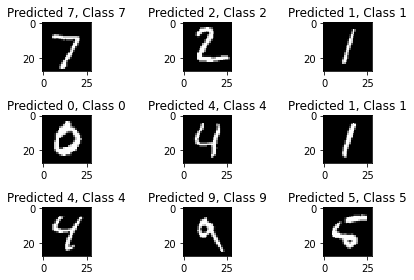

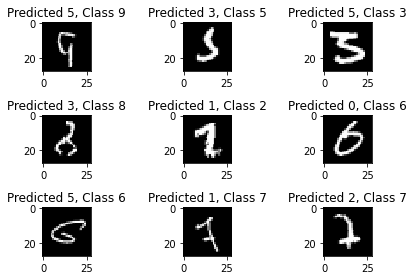

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()